In [1]:
import os
import scanpy
import anndata
import scanpy as sc
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import re
import sklearn
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')
from collections import Counter
import random
import seaborn
import sys
import shutil
import scvelo as scv
import bbknn
import tqdm
#Load my pipeline functions
import importlib
import importlib.util
spec = importlib.util.spec_from_file_location("ScanpyUtilsMT", os.path.expanduser("../../utils/ScanpyUtilsMT.py"))
sc_utils = importlib.util.module_from_spec(spec)
spec.loader.exec_module(sc_utils)
sc.settings.figdir='/wynton/group/ye/mtschmitz/figures/macWbSupervise/'
scv.settings.figdir='/wynton/group/ye/mtschmitz/figures/macWbSupervise/'
sc.settings.file_format_figs='pdf'
sc.settings.autosave=False
sc.settings.autoshow=True

In [2]:
newfile='/wynton/group/ye/mtschmitz/macaquedevbrain/CAT202002_h5ad/KDCbVelocityDYNAMICALMouseWbGe.h5ad'
adata=sc.read(newfile)


In [3]:
adata.obs.dtypes

latent_cell_probability                   float64
latent_RT_efficiency                      float64
n_genes                                     int64
batch_name                               category
dataset_name                             category
timepoint                                 float64
region                                   category
batch                                    category
clean_cellname                           category
full_cellname                              object
leiden                                   category
supervised_name                          category
percent_ribo                              float32
percent_mito                              float32
old_leiden                               category
S_score                                   float32
G2M_score                                 float32
phase                                    category
n_counts                                  float32
cc_velocity_self_transition               float32


In [37]:
adata.var.dtypes

feature_type-0-0         category
id-0-0                     string
name-0-0                   string
feature_type-1-0         category
id-1-0                   category
                           ...   
fit_steady_u              Float64
fit_steady_s              Float64
fit_variance              Float64
fit_alignment_scaling     Float64
fit_r2                    Float64
Length: 916, dtype: object

In [ ]:
from random import random
adata=adata[np.random.choice(adata.obs.index,15000,replace=False),:]

In [ ]:
%matplotlib inline
sc.pl.umap(adata,color=['leiden','latent_time'])

Trying to set attribute `.uns` of view, copying.


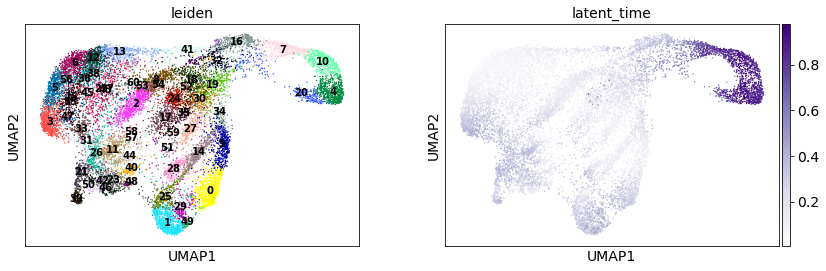

In [77]:
sc.pl.umap(adata,color=['leiden'],legend_loc='on data')

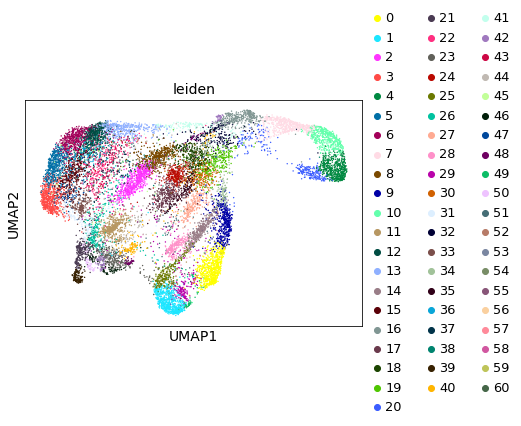

In [18]:
sc.tl.leiden(adata,resolution=5)
sc.pl.umap(adata,color='leiden')

In [21]:
sc.pp.regress_out(adata,keys='linear_velocity_pseudotime')

In [22]:
adata=adata[:,np.isfinite(adata.X.sum(0))]

In [23]:
sc.pp.pca(adata)

In [4]:
adata

AnnData object with n_obs × n_vars = 76804 × 34430
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'n_genes', 'batch_name', 'dataset_name', 'timepoint', 'region', 'batch', 'clean_cellname', 'full_cellname', 'leiden', 'supervised_name', 'percent_ribo', 'percent_mito', 'old_leiden', 'S_score', 'G2M_score', 'phase', 'n_counts', 'cc_velocity_self_transition', 'root_cells', 'end_points', 'cc_velocity_pseudotime', 'latent_time', 'cc_velocity_length', 'cc_velocity_confidence', 'cc_velocity_confidence_transition', 'cc_latent_time', 'linear_velocity_self_transition', 'linear_velocity_pseudotime', 'linear_velocity_length', 'linear_velocity_confidence', 'linear_velocity_confidence_transition'
    var: 'feature_type-0-0', 'id-0-0', 'name-0-0', 'feature_type-1-0', 'id-1-0', 'name-1-0', 'feature_type-0-1', 'id-0-1', 'name-0-1', 'feature_type-1-1', 'id-1-1', 'name-1-1', 'feature_type-0-10', 'id-0-10', 'name-0-10', 'feature_type-1-10', 'id-1-10', 'name-1-10', 'feature_type-0-100', 'id-0-10

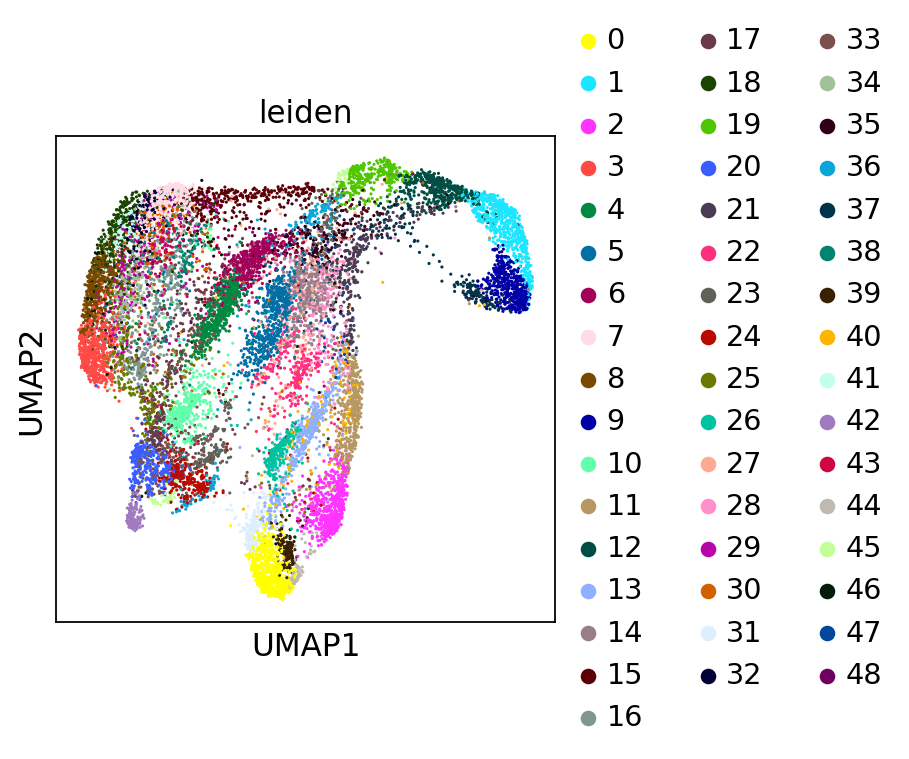

In [43]:
sc.pl.umap(adata,color='leiden',legend_loc='on data')

Trying to set attribute `.uns` of view, copying.


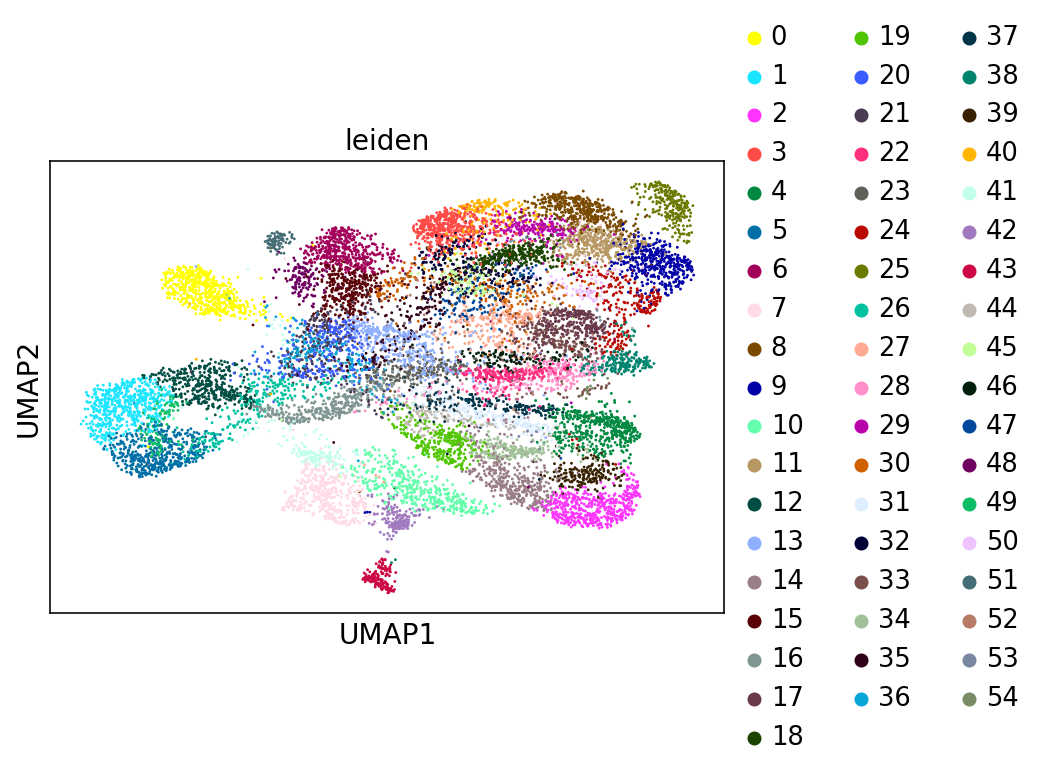

In [69]:
sufficient_cells=adata.obs['batch_name'].value_counts().index[adata.obs['batch_name'].value_counts()>10]
adata=adata[adata.obs['batch_name'].isin(sufficient_cells),:]

import bbknn
bbknn.bbknn(adata,batch_key='batch_name',use_annoy=False,metric='euclidean',neighbors_within_batch=9,pynndescent_n_neighbors=9)
sc.tl.leiden(adata,resolution=5)
sc.pl.umap(adata,color='leiden')

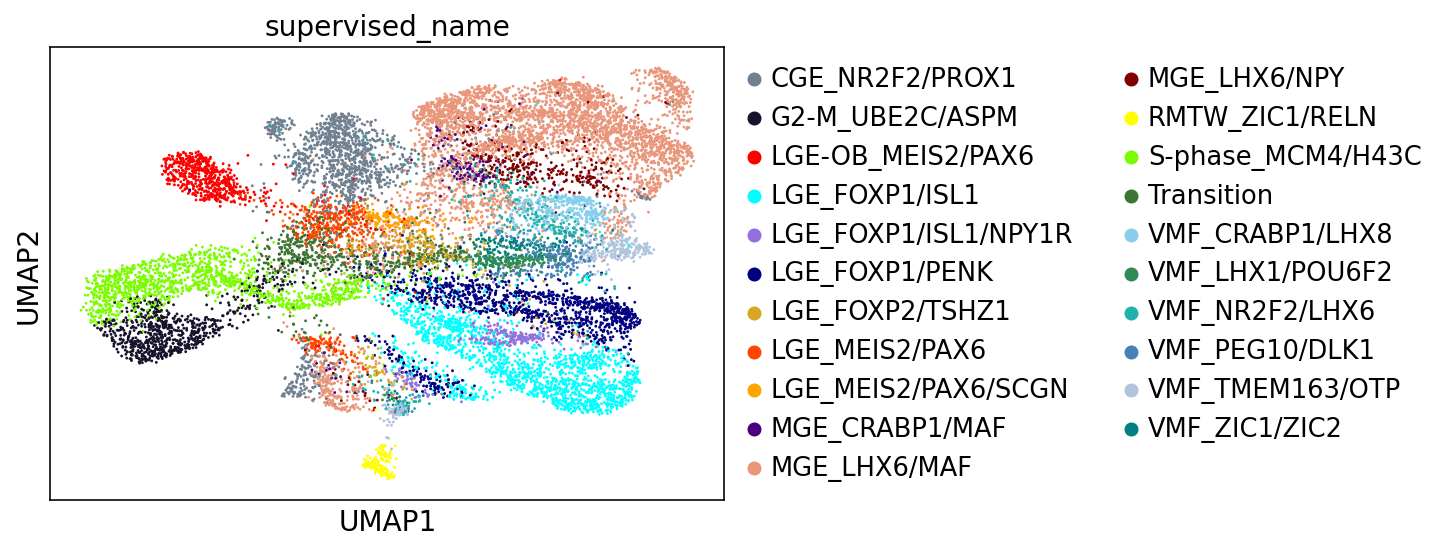

In [70]:
sc.pl.umap(adata,color='supervised_name')

In [71]:
sc.tl.umap(adata)

In [ ]:
sc.pl.umap(adata,color='leiden')

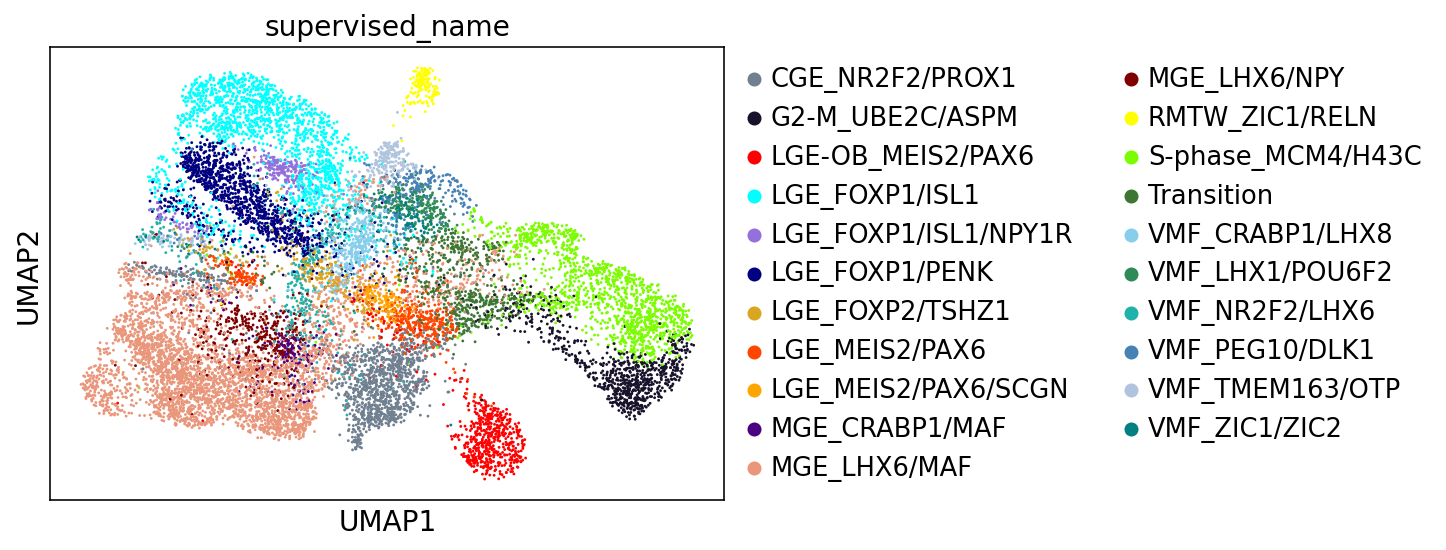

In [73]:
sc.pl.umap(adata,color='supervised_name')

In [ ]:
sc.tl.leiden(adata,resolution=5)
sc.pl.umap(adata,color='leiden')

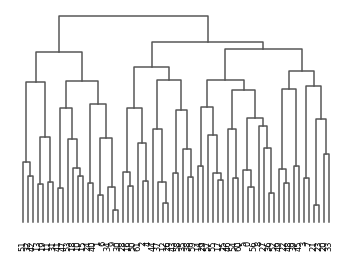

<AxesSubplot:>

In [7]:
sc.tl.dendrogram(adata,groupby='leiden',cor_method='pearson')
sc.pl.dendrogram(adata,groupby='leiden')

In [7]:
adata=adata[:,adata.var.highly_variable]

In [9]:
df=pd.DataFrame(adata[:,adata.var['highly_variable']].X)
df['leiden']=list(adata.obs.leiden)
df1=df.groupby(['leiden']).mean()
corr =df1.T.corr() 


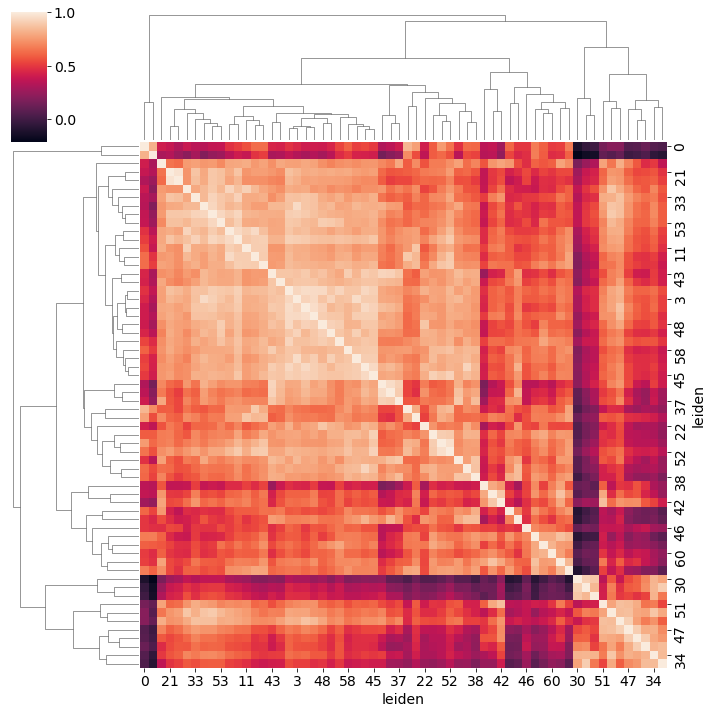

In [18]:
%matplotlib inline
seaborn.clustermap(df1.T.corr())

In [11]:
adata

View of AnnData object with n_obs × n_vars = 76804 × 15000
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'n_genes', 'batch_name', 'dataset_name', 'timepoint', 'region', 'batch', 'clean_cellname', 'full_cellname', 'leiden', 'supervised_name', 'percent_ribo', 'percent_mito', 'old_leiden', 'S_score', 'G2M_score', 'phase', 'n_counts', 'cc_velocity_self_transition', 'root_cells', 'end_points', 'cc_velocity_pseudotime', 'latent_time', 'cc_velocity_length', 'cc_velocity_confidence', 'cc_velocity_confidence_transition', 'cc_latent_time', 'linear_velocity_self_transition', 'linear_velocity_pseudotime', 'linear_velocity_length', 'linear_velocity_confidence', 'linear_velocity_confidence_transition'
    var: 'feature_type-0-0', 'id-0-0', 'name-0-0', 'feature_type-1-0', 'id-1-0', 'name-1-0', 'feature_type-0-1', 'id-0-1', 'name-0-1', 'feature_type-1-1', 'id-1-1', 'name-1-1', 'feature_type-0-10', 'id-0-10', 'name-0-10', 'feature_type-1-10', 'id-1-10', 'name-1-10', 'feature_type-0-100', 

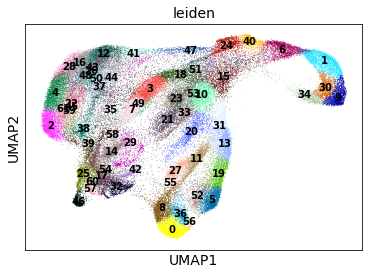

In [19]:
sc.pl.umap(adata,color='leiden',legend_loc='on data')

In [20]:
import statsmodels
import statsmodels.formula.api as smf
def rank_normalize(x):
    vptr=x.rank()
    vptr=(vptr-np.min(vptr))
    vptr=vptr/np.max(vptr)
    return(vptr)

    
for c in corr.columns:
    for p in corr[c].sort_values(ascending=False).index[1:4]:
        print(c,p)
        thisadata=adata[adata.obs.leiden.isin([c,p]),:].copy()
        thisadata.obs.loc[thisadata.obs['leiden']==c,'linear_velocity_pseudotime']=rank_normalize(thisadata.obs.loc[thisadata.obs['leiden']==c,'linear_velocity_pseudotime'])
        thisadata.obs.loc[thisadata.obs['leiden']==p,'linear_velocity_pseudotime']=rank_normalize(thisadata.obs.loc[thisadata.obs['leiden']==p,'linear_velocity_pseudotime'])
        parameters=[]
        for i in tqdm.tqdm(range(thisadata.shape[1])):
            df=pd.DataFrame({'y':thisadata.X[:,i],'linear_velocity_pseudotime':thisadata.obs['linear_velocity_pseudotime'],'leiden':thisadata.obs['leiden']})
            model = smf.ols('y ~ linear_velocity_pseudotime * leiden', data=df)
            model = model.fit()
            parameters.append(model.params)
        paramdf=pd.DataFrame(parameters)
        print(model.params)
        print(np.median(np.abs(paramdf.iloc[:,0])))
        print(np.median(np.abs(paramdf.iloc[:,1])))
        print(np.median(np.abs(paramdf.iloc[:,2])))
        print(np.median(np.abs(paramdf.iloc[:,3])))

0 5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [01:44<00:00, 143.75it/s]


Intercept                                -5.100278e-03
leiden[T.5]                               8.213678e-18
linear_velocity_pseudotime               -1.734300e-18
linear_velocity_pseudotime:leiden[T.5]   -1.822815e-18
dtype: float64
0.01581389043981383
0.001396280215879391
0.0014032808381277343
0.002574361841396834
0 56


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [01:36<00:00, 155.33it/s]


Intercept                                 -5.100278e-03
leiden[T.56]                              -9.206401e-18
linear_velocity_pseudotime                -1.985445e-18
linear_velocity_pseudotime:leiden[T.56]   -6.640738e-19
dtype: float64
0.0158138904398138
0.0015470833418040199
0.00140328083812773
0.0028904866664014152
0 8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [01:42<00:00, 146.46it/s]


Intercept                                -5.100278e-03
leiden[T.8]                               2.990704e-17
linear_velocity_pseudotime               -2.049242e-18
linear_velocity_pseudotime:leiden[T.8]    1.350171e-18
dtype: float64
0.0158138904398138
0.0013884366911683355
0.0014032808381277307
0.002585035586609763
1 30


 26%|████████████████████████████████▎                                                                                          | 3937/15000 [00:25<01:12, 153.37it/s]
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/wynton/home/ye/mschmitz1/utils/miniconda3/envs/scanpy/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/wynton/home/ye/mschmitz1/tmp/ipykernel_31490/2764054310.py", line 19, in <module>
    model = smf.ols('y ~ linear_velocity_pseudotime * leiden', data=df)
  File "/wynton/home/ye/mschmitz1/utils/miniconda3/envs/scanpy/lib/python3.9/site-packages/statsmodels/base/model.py", line 169, in from_formula
    tmp = handle_formula_data(data, None, formula, depth=eval_env,
  File "/wynton/home/ye/mschmitz1/utils/miniconda3/envs/scanpy/lib/python3.9/site-packages/statsmodels/formula/formulatools.py", line 63, in handle_formula_data
    result = dmatrices(formula, Y, depth, return_type='dataframe',
  File "/wynton/home/ye/mschmitz1/utils/miniconda3/envs/scanpy/lib/python3.9/site-packages/patsy/highlevel.py", line 309, in dmatrices
    (lhs, rhs) = _do_hig

TypeError: object of type 'NoneType' has no len()

In [13]:
model.params

Intercept      -3.612798e-03
leiden[T.13]    1.281137e-18
latent_time    -7.589415e-19
dtype: float64

In [55]:
df
# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('y ~ latent_time + leiden', data=df)
model = model.fit()

In [78]:
paramdf

,Intercept,leiden[T.1],latent_time
0,-0.028578,-3.808463e-03,5.698136e-03
1,-0.005755,-3.252607e-19,-4.336809e-18
2,-0.023702,-1.517883e-18,-1.040834e-17
3,-0.009027,-3.794708e-19,-1.734723e-18
4,-0.017346,4.350658e-03,-1.479575e-02
...,...,...,...
2211,-0.093963,6.780377e-02,1.487754e-01
2212,-0.469013,1.759750e-01,1.920136e+00
2213,-0.143425,5.498367e-02,3.946068e-01
2214,-0.028990,-1.972467e-03,-2.534518e-02


<AxesSubplot:xlabel='latent_time'>

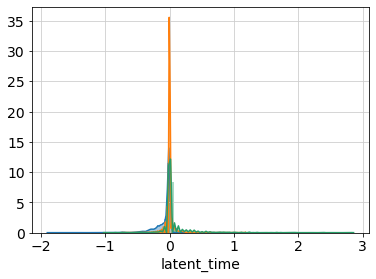

In [73]:
paramdf=pd.DataFrame(parameters)
seaborn.distplot(paramdf.iloc[:,0])
seaborn.distplot(paramdf.iloc[:,1])
seaborn.distplot(paramdf.iloc[:,2])


In [74]:
np.mean(np.abs(paramdf.iloc[:,0]))


0.08081641355724324

In [76]:
np.mean(np.abs(paramdf.iloc[:,1]))


0.020293183068854366

In [75]:
np.mean(np.abs(paramdf.iloc[:,2]))


0.0990924017019991

In [33]:
import sklearn
print(sklearn.metrics.adjusted_rand_score(adata.obs['supervised_name'], adata.obs['leiden']))

0.13956271493994532


In [81]:
sc.tl.leiden(adata,resolution=3)
print(sklearn.metrics.adjusted_rand_score(adata.obs['supervised_name'], adata.obs['leiden']))
sc.tl.leiden(adata,resolution=5)
print(sklearn.metrics.adjusted_rand_score(adata.obs['supervised_name'], adata.obs['leiden']))
sc.tl.leiden(adata,resolution=7)
print(sklearn.metrics.adjusted_rand_score(adata.obs['supervised_name'], adata.obs['leiden']))
sc.tl.leiden(adata,resolution=10)
print(sklearn.metrics.adjusted_rand_score(adata.obs['supervised_name'], adata.obs['leiden']))

0.3764935710957204
0.29140015436649225
0.2101990528091574
0.14407144545056055


In [86]:
adata.uns['linear_velocity_graph']

<15000x15000 sparse matrix of type '<class 'numpy.float32'>'
	with 422943 stored elements in Compressed Sparse Row format>

In [87]:
scv.tl.paga(
    adata,vkey='linear_velocity',
    groups="leiden",
    root_key="initial_states_probs",
    end_key="terminal_states_probs",
    use_time_prior="latent_time",
)

running PAGA using priors: ['latent_time']
    finished (0:00:10) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


the obs value 'leiden' has more than 103 categories. Uniform 'grey' color will be used for all categories.


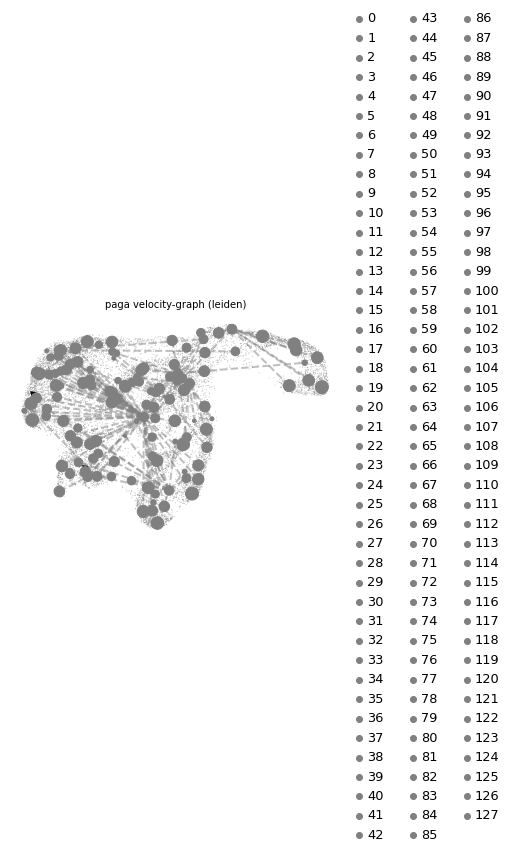

In [89]:
scv.pl.paga(adata,dashed_edges='connectivities_tree',basis='umap')

In [88]:
adata.uns['paga']['connectivities_tree']

{'connectivities': <128x128 sparse matrix of type '<class 'numpy.float64'>'
 	with 11854 stored elements in Compressed Sparse Row format>,
 'connectivities_tree': <128x128 sparse matrix of type '<class 'numpy.float64'>'
 	with 127 stored elements in Compressed Sparse Row format>,
 'transitions_confidence': <128x128 sparse matrix of type '<class 'numpy.float64'>'
 	with 4 stored elements in Compressed Sparse Column format>,
 'threshold': 0.010243325682741663,
 'groups': 'leiden'}

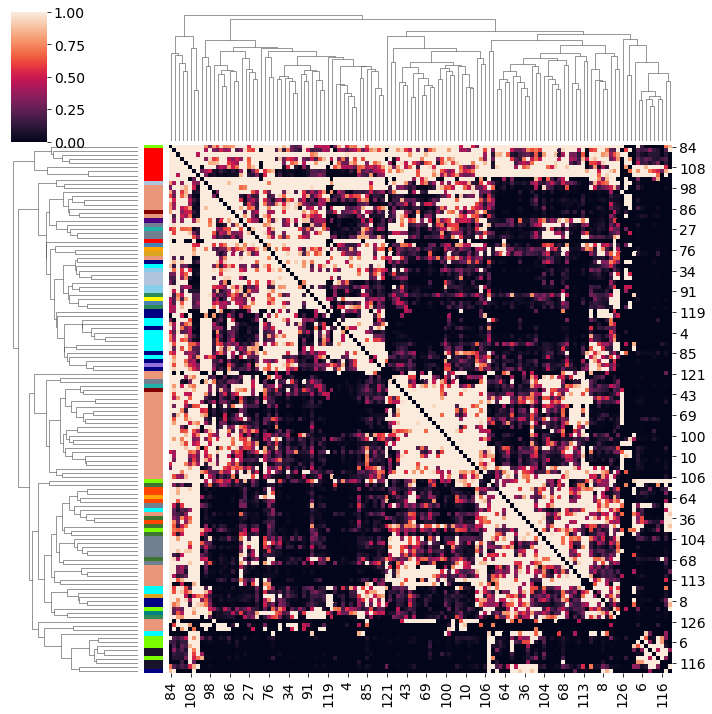

In [94]:
most_common_sn=pd.DataFrame(adata.obs.groupby('leiden')['supervised_name'].value_counts().unstack().idxmax(1))
color_dict=dict(zip(adata.obs.supervised_name.cat.categories,adata.uns['supervised_name_colors']))
row_colors = [color_dict[x] for x in most_common_sn[0]]
mat=pd.DataFrame(adata.uns['paga']['connectivities'].todense(),index=adata.obs.leiden.cat.categories)
seaborn.clustermap(mat,method='average',row_colors=row_colors)


In [ ]:
sc.tl.dendrogram(adata,groupby='leiden')
most_common_sn=pd.DataFrame(adata.obs.groupby('leiden')['agg_supervised_name'].value_counts().unstack().idxmax(1))
color_dict=dict(zip(adata.obs.agg_supervised_name.cat.categories,adata.uns['agg_supervised_name_colors']))
row_colors = [color_dict[x] for x in most_common_sn[0]]
mat=pd.DataFrame(adata.uns['dendrogram_leiden']['correlation_matrix'],index=adata.obs.leiden.cat.categories)
seaborn.clustermap(mat,method='average',row_colors=row_colors)
